In [1]:
# I check python version
!python --version

Python 3.7.13


In [1]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
# Definition of variables
data = []
labels = []
classes = 43
# cur_path = os.getcwd()
cur_path = "/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset"

In [3]:
# Retrieval of images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    print(path)
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/0
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/1
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/2
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/3
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/4
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/5
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/6
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/7
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/8
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/9
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/10
/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/train/11
/content/drive/MyDrive/Cuarto/Segundo 

In [4]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
# Building the model
model = Sequential()
model.add(
    Conv2D(
        filters=32, kernel_size=(5, 5), activation="relu", input_shape=X_train.shape[1:]
    )
)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [6]:
# Compilation of the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 15
history = model.fit(
    X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test)
)
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 20s 11ms/step - loss: 1.6598 - accuracy: 0.5709 - val_loss: 0.3546 - val_accuracy: 0.9217
Epoch 2/15
981/981 [==============================] - 10s 10ms/step - loss: 0.4847 - accuracy: 0.8614 - val_loss: 0.1007 - val_accuracy: 0.9754
Epoch 3/15
981/981 [==============================] - 10s 10ms/step - loss: 0.3056 - accuracy: 0.9167 - val_loss: 0.0911 - val_accuracy: 0.9782
Epoch 4/15
981/981 [==============================] - 10s 10ms/step - loss: 0.2584 - accuracy: 0.9293 - val_loss: 0.0824 - val_accuracy: 0.9783
Epoch 5/15
981/981 [==============================] - 10s 10ms/step - loss: 0.2273 - accuracy: 0.9388 - val_loss: 0.0601 - val_accuracy: 0.9843
Epoch 6/15
981/981 [==============================] - 10s 10ms/step - loss: 0.2289 - accuracy: 0.9388 - val_loss: 0.0574 - val_accuracy: 0.9842
Epoch 7/15
981/981 [==============================] - 10s 10ms/step - loss: 0.2147 - accuracy: 0.9443 - val_loss: 0.0579 - val_accuracy:

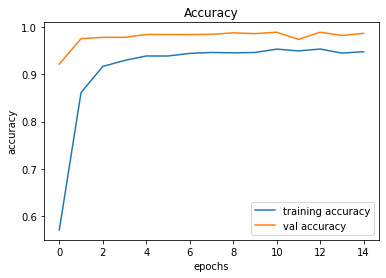

In [7]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

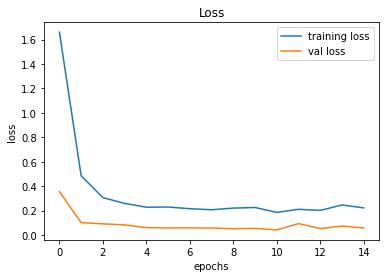

In [8]:
plt.figure(1)
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
# Testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open("/content/drive/MyDrive/Cuarto/Segundo Cuatrimestre/TFG/Material/Dataset/" + img)
    image = image.resize((30, 30))
    data.append(np.array(image))

In [11]:
X_test = np.array(data)

pred = model.predict(X_test)

# Accuracy and stats with the test data
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(labels, np.argmax(pred, axis = 1)))

Accuracy:  0.9529691211401425


In [12]:
print(classification_report(labels, np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.95      0.96      0.96       720
           2       0.96      0.98      0.97       750
           3       0.98      0.96      0.97       450
           4       0.99      0.97      0.98       660
           5       0.90      0.96      0.93       630
           6       0.95      0.71      0.81       150
           7       0.95      0.98      0.96       450
           8       0.94      0.98      0.96       450
           9       0.97      0.99      0.98       480
          10       0.98      0.99      0.99       660
          11       0.91      0.97      0.94       420
          12       0.99      0.95      0.97       690
          13       0.99      0.99      0.99       720
          14       0.99      0.99      0.99       270
          15       0.87      0.99      0.93       210
          16       0.97      1.00      0.99       150
          17       0.98    